In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
csv_path = "data/hprice.csv"
assert os.path.exists(csv_path), f"CSV not found at {csv_path}"
df = pd.read_csv(csv_path)
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [73]:
df.shape


(3479, 8)

In [74]:
df.columns.tolist()

['Area',
 'Room',
 'Parking',
 'Warehouse',
 'Elevator',
 'Address',
 'Price',
 'Price(USD)']

In [75]:
df.info

<bound method DataFrame.info of      Area  Room  Parking  Warehouse  Elevator             Address  \
0      63     1     True       True      True             Shahran   
1      60     1     True       True      True             Shahran   
2      79     2     True       True      True              Pardis   
3      95     2     True       True      True       Shahrake Qods   
4     123     2     True       True      True      Shahrake Gharb   
...   ...   ...      ...        ...       ...                 ...   
3474   86     2     True       True      True  Southern Janatabad   
3475   83     2     True       True      True            Niavaran   
3476   75     2    False      False     False              Parand   
3477  105     2     True       True      True              Dorous   
3478   82     2    False       True      True              Parand   

             Price  Price(USD)  
0     1.850000e+09    61666.67  
1     1.850000e+09    61666.67  
2     5.500000e+08    18333.33  
3     9

In [76]:
display(df.select_dtypes(include=[np.number]).describe().T)


,count,mean,std,min,25%,50%,75%,max
Room,3479.0,2.079908e+00,7.582753e-01,0.0,2.000000e+00,2.000000e+00,2.000000e+00,5.000000e+00
Price,3479.0,5.359023e+09,8.099935e+09,3600000.0,1.418250e+09,2.900000e+09,6.000000e+09,9.240000e+10
Price(USD),3479.0,1.786341e+05,2.699978e+05,120.0,4.727500e+04,9.666667e+04,2.000000e+05,3.080000e+06


In [77]:
na_cnt=df.isna().sum().sort_values(ascending=False)
print(na_cnt)

Address       23
Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Price          0
Price(USD)     0
dtype: int64


In [78]:
na_pct=(na_cnt/len(df)*100).round(2)
print(na_pct)

Address       0.66
Area          0.00
Room          0.00
Parking       0.00
Warehouse     0.00
Elevator      0.00
Price         0.00
Price(USD)    0.00
dtype: float64


In [79]:
na_report=pd.DataFrame({"Missing": na_cnt, "Missing_%":na_pct})
print(na_report)

            Missing  Missing_%
Address          23       0.66
Area              0       0.00
Room              0       0.00
Parking           0       0.00
Warehouse         0       0.00
Elevator          0       0.00
Price             0       0.00
Price(USD)        0       0.00


In [80]:
na_report[na_report['Missing']>0].head(20)

,Missing,Missing_%
Address,23,0.66


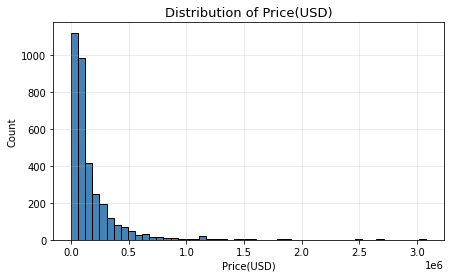

In [81]:
target_col='Price(USD)'
assert target_col in df.columns, f"{target_col} not found in dataframe columns"
plt.figure(figsize=(7,4))
plt.hist(df[target_col].dropna(),bins=50,color='steelblue',edgecolor='black')
plt.title(f'Distribution of {target_col}',fontsize=13)
plt.xlabel(target_col)
plt.ylabel('Count')
plt.grid(alpha=0.3)
plt.show()


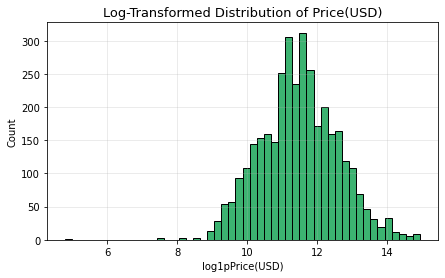

In [82]:
plt.figure(figsize=(7,4))
plt.hist(np.log1p(df[target_col].dropna()),bins=50,color='mediumseagreen',edgecolor='black')
plt.title(f"Log-Transformed Distribution of {target_col}",fontsize=13)
plt.xlabel(f"log1p{target_col}")
plt.ylabel("Count")
plt.grid(alpha=0.3)
plt.show()

,pearson corr
Price,1.000000
Room,0.567732


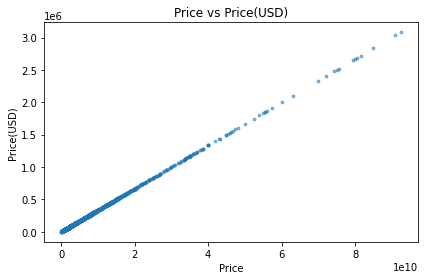

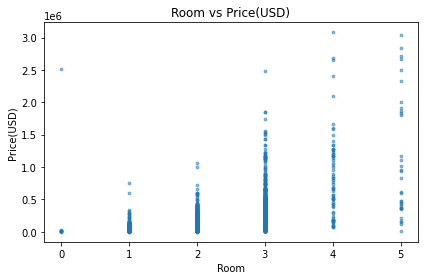

In [83]:
num_df=df.select_dtypes(include=[np.number]).copy()
num_df=num_df.dropna(subset=[target_col])
corr_mat = num_df.corr()
corr_series=num_df.corr(numeric_only=True)[target_col].drop(labels=[target_col],errors="ignore")
top_k=6
top_feats=corr_series.abs().sort_values(ascending=False).head(top_k).index.tolist()
corr_table=corr_series.loc[top_feats].sort_values(ascending=False).to_frame(name='pearson corr')
display(corr_table)
for col in top_feats:
    x=num_df[col]
    y=num_df[target_col]
    mask=np.isfinite(x)& np.isfinite(y)
    x,y=x[mask],y[mask]
    
    plt.figure(figsize=(6,4))
    plt.scatter(x,y, s=8, alpha=0.5)
    plt.title(f"{col} vs {target_col}")
    plt.xlabel(col); plt.ylabel(target_col)
    plt.tight_layout()
    plt.show()

In [84]:
DATA_PATH="data/hprice.csv"
CLEAN_PATH="data/hprice_clean.csv"
df=pd.read_csv(DATA_PATH)
raw=df.copy()
print("Loaded shape:",df.shape)

Loaded shape: (3479, 8)


In [85]:
df.columns=(
    df.columns
    .str.strip()
    .str.replace(r"\s+","_",regex=True)

)

In [86]:
if "Price(USD)" in df.columns and "Price" in df.columns:
    print(" Two price columns found: keeping 'Price(USD)', dropping 'Price'")
    df = df.drop(columns=["Price"])
    target_col = "Price(USD)"

 Two price columns found: keeping 'Price(USD)', dropping 'Price'


In [87]:
if target_col not in df.columns:
    cand = [c for c in df.columns if c.lower() -- target_col.lower()]
    if cand:
        df=df.rename(column={cand[0]:target_col})
        assert target_col in df.columns , f"there is no {target_col} in the data set!!!"

In [88]:
before=len(df)
df=df.dropna(subset=[target_col])
print(f"dropped rows missing {target_col}: {before-len(df)}")

dropped rows missing Price(USD): 0


In [89]:
dup_cnt=df.duplicated().sum()
df=df.drop_duplicates()
print(f"duplicate rows removed: {dup_cnt}")

duplicate rows removed: 208


In [90]:
num_cols=df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols= [c for c in df.columns if c not in num_cols and c != target_col]
num_cols_wo_target=[c for c in num_cols if c !=target_col]
print("Numeri cols:",num_cols)
print("Categorical cols:",cat_cols)

Numeri cols: ['Room', 'Price(USD)']
Categorical cols: ['Area', 'Parking', 'Warehouse', 'Elevator', 'Address']


In [91]:
if num_cols_wo_target:
    medians=df[num_cols_wo_target].median()
    df[num_cols_wo_target]= df[num_cols_wo_target].fillna(medians)

In [92]:
for col in cat_cols:
    if df[col].isna().any():
        mode_val=df[col].mode(dropna=True)
        df[col]=df[col].fillna(mode_val.iloc[0] if not mode_val.empty else "Unknown")

In [93]:
rare_threshold = 0.01
for col in cat_cols:
    vc = df[col].value_counts(normalize=True, dropna=False)
    rare_levels = vc[vc < rare_threshold].index
    if len(rare_levels):
        df[col] = df[col].where(~df[col].isin(rare_levels), "__RARE__")


In [94]:
features = [c for c in df.columns if c != target_col]
X_enc = pd.get_dummies(df[features], drop_first=True)
df_clean = pd.concat([X_enc, df[[target_col]].reset_index(drop=True)], axis=1)


In [95]:
features = [c for c in df.columns if c != target_col]
X_enc = pd.get_dummies(df[features], drop_first=True)
df_clean = pd.concat([X_enc, df[[target_col]].reset_index(drop=True)], axis=1)


In [96]:
print("\n--- Cleaning Report ---")
print("Original shape:", raw.shape)
print("After dropna(target)+dedup:", df.shape)
print("Final encoded shape:", df_clean.shape)
print("Any NA in df_clean? ->", df_clean.isna().any().any())
print("Sample columns:", list(df_clean.columns[:10]))
print(df_clean.head().to_string(index=False))



--- Cleaning Report ---
Original shape: (3479, 8)
After dropna(target)+dedup: (3271, 7)
Final encoded shape: (3462, 63)
Any NA in df_clean? -> True
Sample columns: ['Room', 'Parking', 'Warehouse', 'Elevator', 'Area_105', 'Area_110', 'Area_115', 'Area_120', 'Area_125', 'Area_130']
 Room Parking Warehouse Elevator Area_105 Area_110 Area_115 Area_120 Area_125 Area_130 Area_135 Area_140 Area_150 Area_200 Area_50 Area_55 Area_58 Area_60 Area_62 Area_63 Area_65 Area_68 Area_70 Area_72 Area_75 Area_78 Area_80 Area_85 Area_86 Area_87 Area_88 Area_90 Area_95 Area___RARE__ Address_Central Janatabad Address_East Ferdows Boulevard Address_Ekhtiarieh Address_Farmanieh Address_Feiz Garden Address_Gheitarieh Address_Heravi Address_Islamshahr Address_Jeyhoon Address_Niavaran Address_Northern Janatabad Address_Ostad Moein Address_Parand Address_Pardis Address_Pasdaran Address_Persian Gulf Martyrs Lake Address_Pirouzi Address_Punak Address_Saadat Abad Address_Salsabil Address_Shahr-e-Ziba Address_Shahr

In [97]:
df_clean.isna().sum()


Room                              191
Parking                           191
Warehouse                         191
Elevator                          191
Area_105                          191
                                 ... 
Address_Southern Janatabad        191
Address_West Ferdows Boulevard    191
Address_Yousef Abad               191
Address___RARE__                  191
Price(USD)                        191
Length: 63, dtype: int64

In [98]:
# حذف تمام ردیف‌هایی که حداقل یک مقدار خالی دارن
before = len(df_clean)
df_clean = df_clean.dropna()
after = len(df_clean)
print(f"Removed {before - after} rows with missing values.")
print("Any NA left? ->", df_clean.isna().any().any())


Removed 382 rows with missing values.
Any NA left? -> False


In [99]:
df_clean.to_csv(CLEAN_PATH, index=False)
print(f"\n Saved to: {CLEAN_PATH}")



 Saved to: data/hprice_clean.csv
